In [1]:
# Importação das bibliotecas,  e 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # sklearn para criar o modelo de regressão
# Warning 
from yellowbrick.regressor import ResidualsPlot # yellowbrick para visualização de residuais

In [4]:
base = pd.read_csv('slr12.csv', sep=';')
base.shape

(36, 2)

In [5]:
base.head()

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [6]:
# Definição das variáveis X e Y, 
# x = Taxa Anual(FrqAnual) - variável independente 
# Y Custo Inicial(CusInic) - variável dependente
X = base.iloc[:, 0].values # Taxa Anual
y = base.iloc[:, 1].values # Custo Inicial
X

array([1000, 1125, 1087, 1070, 1100, 1150, 1250, 1150, 1100, 1350, 1275,
       1375, 1175, 1200, 1175, 1300, 1260, 1330, 1325, 1200, 1225, 1090,
       1075, 1080, 1080, 1180, 1225, 1175, 1250, 1250,  750, 1125,  700,
        900,  900,  850], dtype=int64)

In [7]:
# Cálculo da correlação entre X e Y
correlacao = np.corrcoef(X, y)
correlacao

array([[1.        , 0.47700725],
       [0.47700725, 1.        ]])

In [8]:
# Formato de matriz com uma coluna a mais
X = X.reshape(-1, 1) 
# Criação do modelo e treinamento (fit indica que o treinamento deve ser executado)
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [9]:
# Visualização dos coeficientes, onde toca o eixo y
modelo.intercept_

867.604222262056

In [11]:
# inclinacao é quando a variável y cresce o eixo x cresce
modelo.coef_

array([0.37315794])

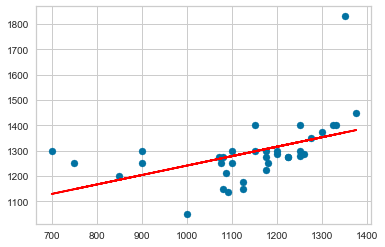

In [13]:
# Geração do gráfico com os pontos reais e as previsões
plt.scatter(X, y) # criação do gráfico
plt.plot(X, modelo.predict(X), color = 'red') # criação da linha de menor ajuste

In [21]:
modelo.intercept_ + modelo.coef_ * 0

array([867.60422226])

In [20]:
# Criando a previsão utilizando função do sklearn
modelo.predict([[1300]])

array([1352.70953897])

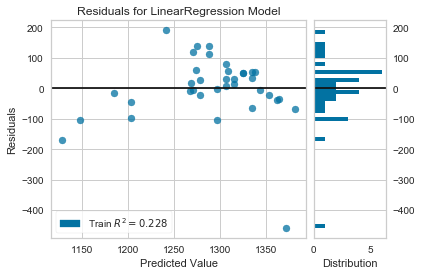

In [19]:
# Gráfico para visualizar os residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof()